### The following notebook accomplishes the following things:
1. Extracts the results from the observations file 
2. Creates the input file for initial conditions based on the spinup observations

In [1]:
%matplotlib inline
import sys,os
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import h5py
import pandas as pd

In [6]:
#### Extracting the measured data
Yakou_measured_data = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv', sep='\t',index_col='TIMESTAMP')
Yakou_measured_data.head()

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
TIMESTAMP,,,,,,,,,,,,,,,
2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,-11.848819,-11.295486,-9.824722,-7.814958,-4.874889,-3.447965
2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,-11.342569,-10.947708,-9.781389,-7.936854,-5.063889,-3.639549
2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,-11.200694,-10.765278,-9.618403,-7.946111,-5.228028,-3.817500
2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,-11.365486,-10.867778,-9.648889,-7.977951,-5.358771,-3.977958
2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,-11.691181,-11.171181,-9.829653,-8.078194,-5.476889,-4.119438


In [7]:
# Calculating the temperature in Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_values = 1096 # Number of time values

times = np.arange(1, time_values+1, 1)

# Adding column information:


x = 0
for i, depth in enumerate(depths):
        Yakou_measured_data[f'Soil temperature at - {depth} m (K)'] = Yakou_measured_data[f'Soil temperature at - {depth} m (°C)'] + 273.15

Yakou_measured_data['Soil temperature at - 0.04 m (K)'].head()

TIMESTAMP
2016-01-01    260.642153
2016-01-02    261.288403
2016-01-03    261.325486
2016-01-04    261.152153
2016-01-05    260.778403
Name: Soil temperature at - 0.04 m (K), dtype: float64

In [8]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3

poro_peat = 6.3739496E-01

poro_mineral = 4.8103077E-01

for i, depth in enumerate(depths):
    if depth < depth_peat:
        Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_peat*100)
    else:
        Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_mineral*100)

#### Testing the results from SWE simulation

In [10]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Dynamic_Spinup_Case3'

In [58]:
# Storing the data in dataframes

sim_data_dynspinup_nosnow = pd.read_csv('Dyn_spinup_nosnow_2.demo/observations.dat',skiprows=88,sep=' ') 
#sim_data_swe_iniT265 = pd.read_csv('Case5_2017_oldcomp_iniT265.demo/observation.dat',skiprows=88,sep=' ')
#sim_data_swe_iniT263 = pd.read_csv('Case5_2017_oldcomp_iniT263.demo/observation.dat',skiprows=88,sep=' ')

# Considering simulation results after the initial condition (after the first value)

#sim_data_dynspinup_nosnow = sim_data_dynspinup_nosnow[1:]
#sim_data_swe_iniT265 = sim_data_swe_iniT265[1:]
#sim_data_swe_iniT263 = sim_data_swe_iniT263[1:]


# Changing the index to time series
#sim_data_swe.index = Yakou_measured_data.loc['2017'].index


sim_data_dynspinup_nosnow.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
0,0.0,264.150176,264.150176,264.150176,264.150175,264.150175,264.150175,264.150175,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498
1,86400.0,263.313650,263.735926,263.992236,264.080003,264.139277,264.148816,264.149954,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498
2,172800.0,262.681307,263.298338,263.753193,263.932822,264.094607,264.137747,264.146817,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498
3,259200.0,262.204264,262.930644,263.519930,263.769370,264.028977,264.116014,264.139136,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498
4,345600.0,261.689308,262.553178,263.275831,263.591317,263.946669,264.083359,264.125719,0.224325,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498


In [59]:
len(sim_data_dynspinup_nosnow)

83

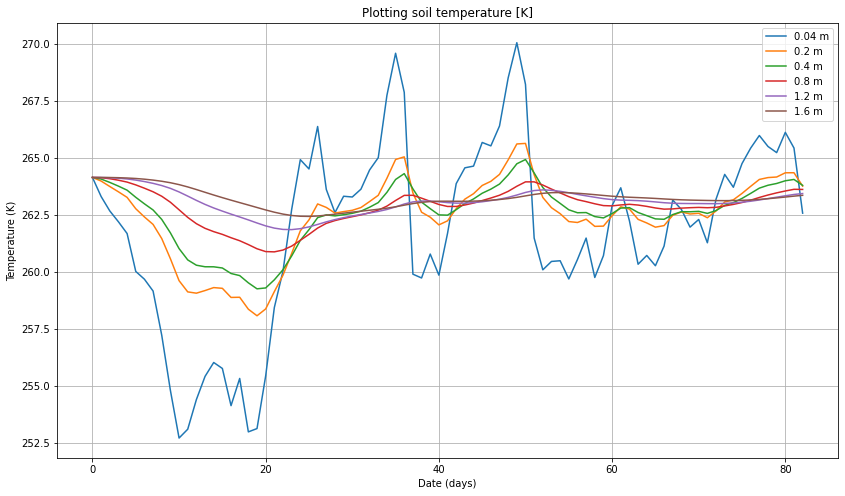

In [60]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
plt.plot(sim_data_dynspinup_nosnow['point -0.04 temperature [K]'],label='0.04 m')
plt.plot(sim_data_dynspinup_nosnow['point -0.2 temperature [K]'],label='0.2 m')
plt.plot(sim_data_dynspinup_nosnow['point -0.4 temperature [K]'],label='0.4 m')
plt.plot(sim_data_dynspinup_nosnow['point -0.8 temperature [K]'],label='0.8 m')
plt.plot(sim_data_dynspinup_nosnow['point -1.2 temperature [K]'],label='1.2 m')
plt.plot(sim_data_dynspinup_nosnow['point -1.6 temperature [K]'],label='1.6 m')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
#plt.ylim(264,266)
plt.grid(True)

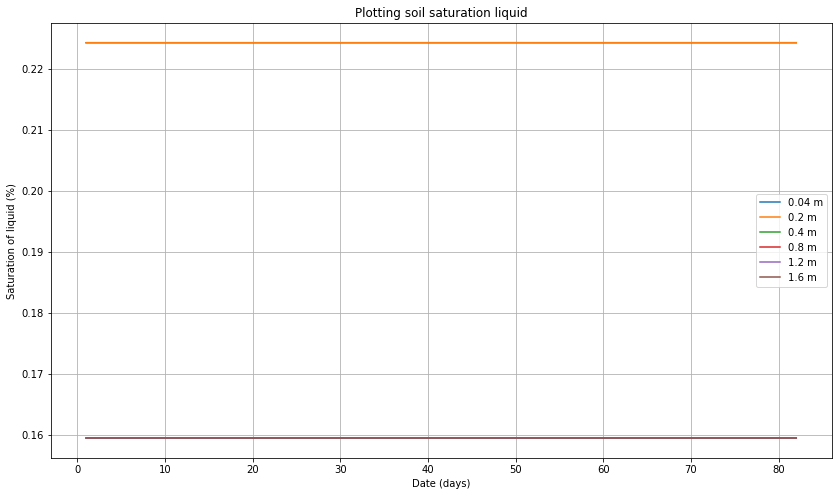

In [57]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil saturation liquid')
#plt.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
plt.plot(sim_data_dynspinup_nosnow['point -0.04 saturation liquid'],label='0.04 m')
plt.plot(sim_data_dynspinup_nosnow['point -0.2 saturation liquid'],label='0.2 m')
plt.plot(sim_data_dynspinup_nosnow['point -0.4 saturation liquid'],label='0.4 m')
plt.plot(sim_data_dynspinup_nosnow['point -0.8 saturation liquid'],label='0.8 m')
plt.plot(sim_data_dynspinup_nosnow['point -1.2 saturation liquid'],label='1.2 m')
plt.plot(sim_data_dynspinup_nosnow['point -1.6 saturation liquid'],label='1.6 m')

plt.ylabel('Saturation of liquid (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

In [70]:
# Calculating the VWC
def vwc_calc(df):

    depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

    depth_peat = 0.3

    poro_peat = 0.63988208184177

    poro_mineral = 0.48172111121377

    for i, depth in enumerate(depths):
        if depth < depth_peat:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_peat*100)
        else:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_mineral*100)
    
    return df

In [71]:
sim_data_swe = vwc_calc(sim_data_swe)
sim_data_swe_iniT265 = vwc_calc(sim_data_swe_iniT265)
sim_data_swe_iniT263 = vwc_calc(sim_data_swe_iniT263)

In [72]:
len(sim_data_swe)

365

Text(0.5, 0, 'Days')

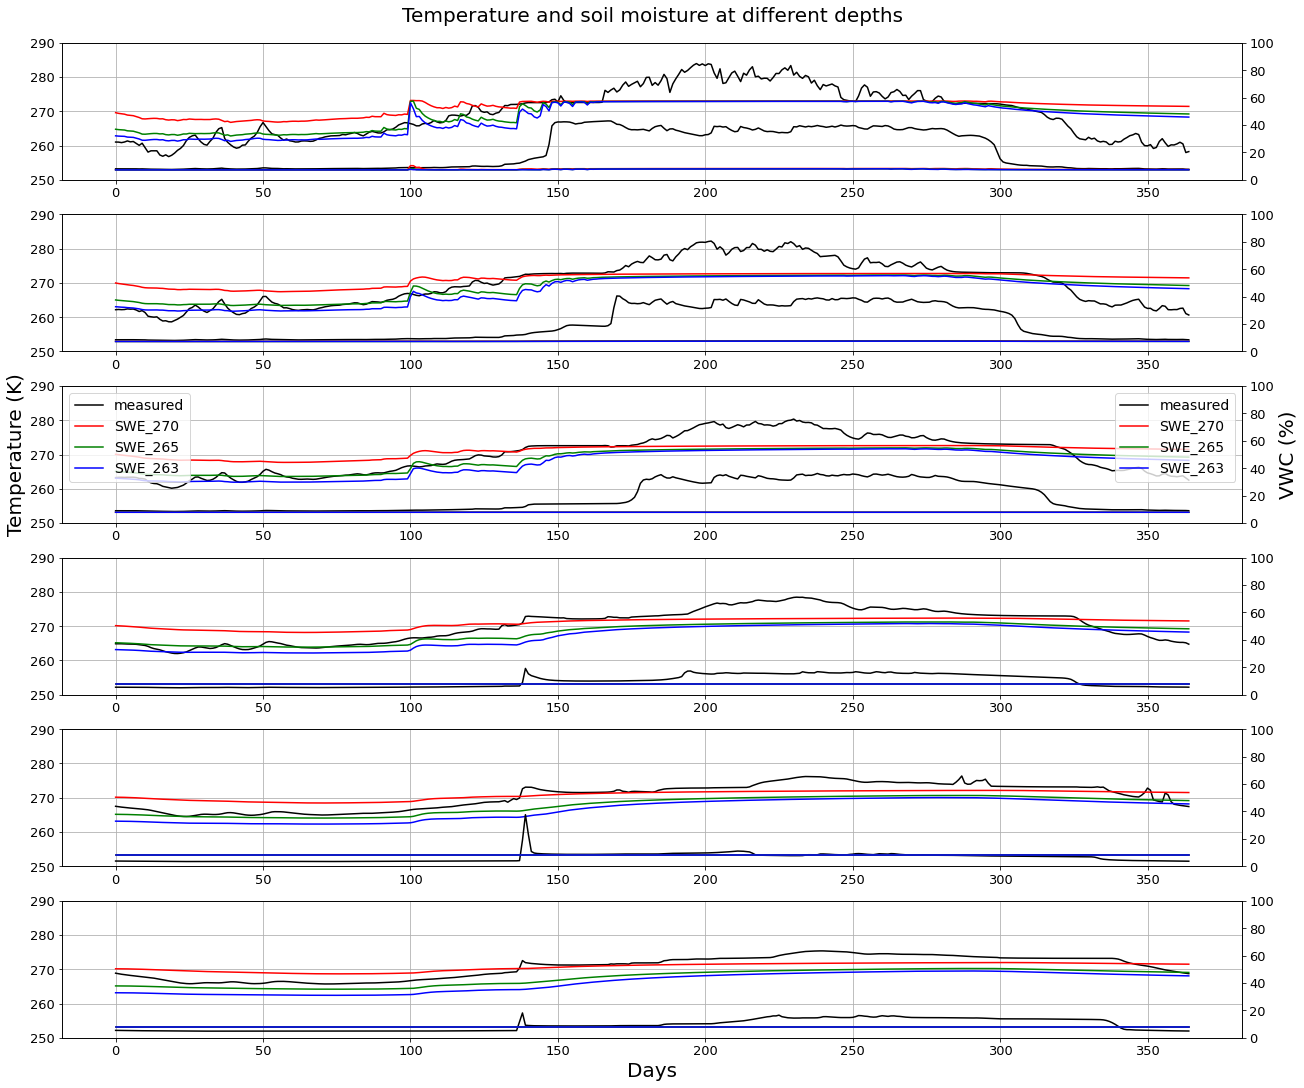

In [74]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)
time_period_1 = np.arange(0,len(sim_data_swe))

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_swe[f'point -{depth} temperature [K]'].values, 'r', label='SWE_270')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_swe_iniT265[f'point -{depth} temperature [K]'].values, 'g', label='SWE_265')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_swe_iniT263[f'point -{depth} temperature [K]'].values, 'b', label='SWE_263')
    #locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd100[f'point -{depth} temperature [K]']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd40[f'point -{depth} temperature [K]']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd10[f'point -{depth} temperature [K]']['2017'].values, 'y', label='sim-sd=10 kg/m3')
    #locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2017'].values, 'k', label='measured')
    ax2.plot(time_period_1, sim_data_swe[f'Soil moisture at - {depth} m (%)'].values, 'r', label='SWE_270')
    ax2.plot(time_period_1, sim_data_swe_iniT265[f'Soil moisture at - {depth} m (%)'].values, 'g', label='SWE_265')
    ax2.plot(time_period_1, sim_data_swe_iniT263[f'Soil moisture at - {depth} m (%)'].values, 'b', label='SWE_263')
    #ax2.plot(time_period, sim_data_sd100[f'Soil moisture at - {depth} m (%)']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    #ax2.plot(time_period, sim_data_sd40[f'Soil moisture at - {depth} m (%)']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    #ax2.plot(time_period, sim_data_sd10[f'Soil moisture at - {depth} m (%)']['2017'].values, 'y', label='sim-sd=10 kg/m3')

    #ax2.plot(time_period, mois_measured[x:x+365].values, 'k--', label=f'measured')
    #ax2.plot(time_period, mois_sim_1[x:x+365].values, 'r--', label=f'M-Case 1')
    #ax2.plot(time_period, mois_sim_2[x:x+365].values, 'b--', label=f'M-Case 2')
    #x2.plot(time_period, mois_sim_3[x:x+365].values, 'y--', label=f'M-Case 2_1')
    #ax2.plot(time_period, mois_sim_4[x:x+365].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

### Solution:

#### Comparing all the four results - 

In [18]:
# Storing the data in dataframes

sim_data_sd200 = pd.read_csv('Case5_III_C_glm_aftercalib.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_sd100 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.1.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_sd10 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.01.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_sd40 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.04.demo/observation.dat',skiprows=88,sep=' ') 

# Considering simulation results after the initial condition (after the first value)

sim_data_sd10 = sim_data_sd10[1:]
sim_data_sd40 = sim_data_sd40[1:]
sim_data_sd100 = sim_data_sd100[1:]
sim_data_sd200 = sim_data_sd200[1:]

# Changing the index to time series
sim_data_sd10.index = Yakou_measured_data.index
sim_data_sd40.index = Yakou_measured_data.index
sim_data_sd100.index = Yakou_measured_data.index
sim_data_sd200.index = Yakou_measured_data.loc['2017'].index

sim_data_sd40.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
TIMESTAMP,,,,,,,,,,,,,,,
2016-01-01,86400.0,269.439951,269.738875,269.928668,270.039606,270.132711,270.147951,270.149673,0.114454,0.114604,0.114710,0.162516,0.162516,0.162517,0.162517
2016-01-02,172800.0,268.369493,269.005538,269.445862,269.738399,270.048951,270.128793,270.144414,0.114037,0.114265,0.114456,0.162514,0.162516,0.162516,0.162517
2016-01-03,259200.0,267.285336,268.173945,268.841418,269.323534,269.903678,270.085882,270.130049,0.113737,0.113975,0.114201,0.162512,0.162515,0.162516,0.162516
2016-01-04,345600.0,265.981254,267.170290,268.094655,268.791824,269.693235,270.012962,270.102157,0.113471,0.113710,0.113952,0.162510,0.162514,0.162516,0.162516
2016-01-05,432000.0,264.187754,265.819251,267.100499,268.084587,269.401677,269.902525,270.055990,0.113205,0.113443,0.113694,0.162508,0.162513,0.162515,0.162516


In [19]:
# Calculating the VWC
def vwc_calc(df):

    depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

    depth_peat = 0.3

    poro_peat = 0.63988208184177

    poro_mineral = 0.48172111121377

    for i, depth in enumerate(depths):
        if depth < depth_peat:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_peat*100)
        else:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_mineral*100)
    
    return df

In [20]:
sim_data_sd10_v = vwc_calc(sim_data_sd10)
sim_data_sd40_v = vwc_calc(sim_data_sd40)
sim_data_sd100_v = vwc_calc(sim_data_sd100)
sim_data_sd200_v = vwc_calc(sim_data_sd200)

sim_data_sd10_v.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,...,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2016-01-01,86400.0,269.439671,269.738723,269.928590,270.039569,270.132706,270.147950,270.149672,0.114454,0.114604,...,0.162516,0.162517,0.162517,7.323676,7.333292,7.340080,7.828732,7.828761,7.828766,7.828767
2016-01-02,172800.0,268.368121,269.004691,269.445360,269.738116,270.048886,270.128780,270.144410,0.114036,0.114265,...,0.162516,0.162516,0.162517,7.296976,7.311592,7.323848,7.828648,7.828735,7.828760,7.828765
2016-01-03,259200.0,267.280434,268.170824,268.839503,269.322413,269.903392,270.085817,270.130031,0.113736,0.113975,...,0.162515,0.162516,0.162516,7.277750,7.293026,7.307490,7.828555,7.828692,7.828746,7.828760
2016-01-04,345600.0,265.972329,267.164205,268.090670,268.789340,269.692506,270.012771,270.102096,0.113469,0.113709,...,0.162514,0.162516,0.162516,7.260701,7.276012,7.291487,7.828462,7.828637,7.828724,7.828751
2016-01-05,432000.0,264.168485,265.806171,267.091907,268.079186,269.400025,269.902061,270.055833,0.113202,0.113441,...,0.162513,0.162515,0.162516,7.243623,7.258868,7.274956,7.828369,7.828570,7.828691,7.828737


Text(0.5, 0, 'Days')

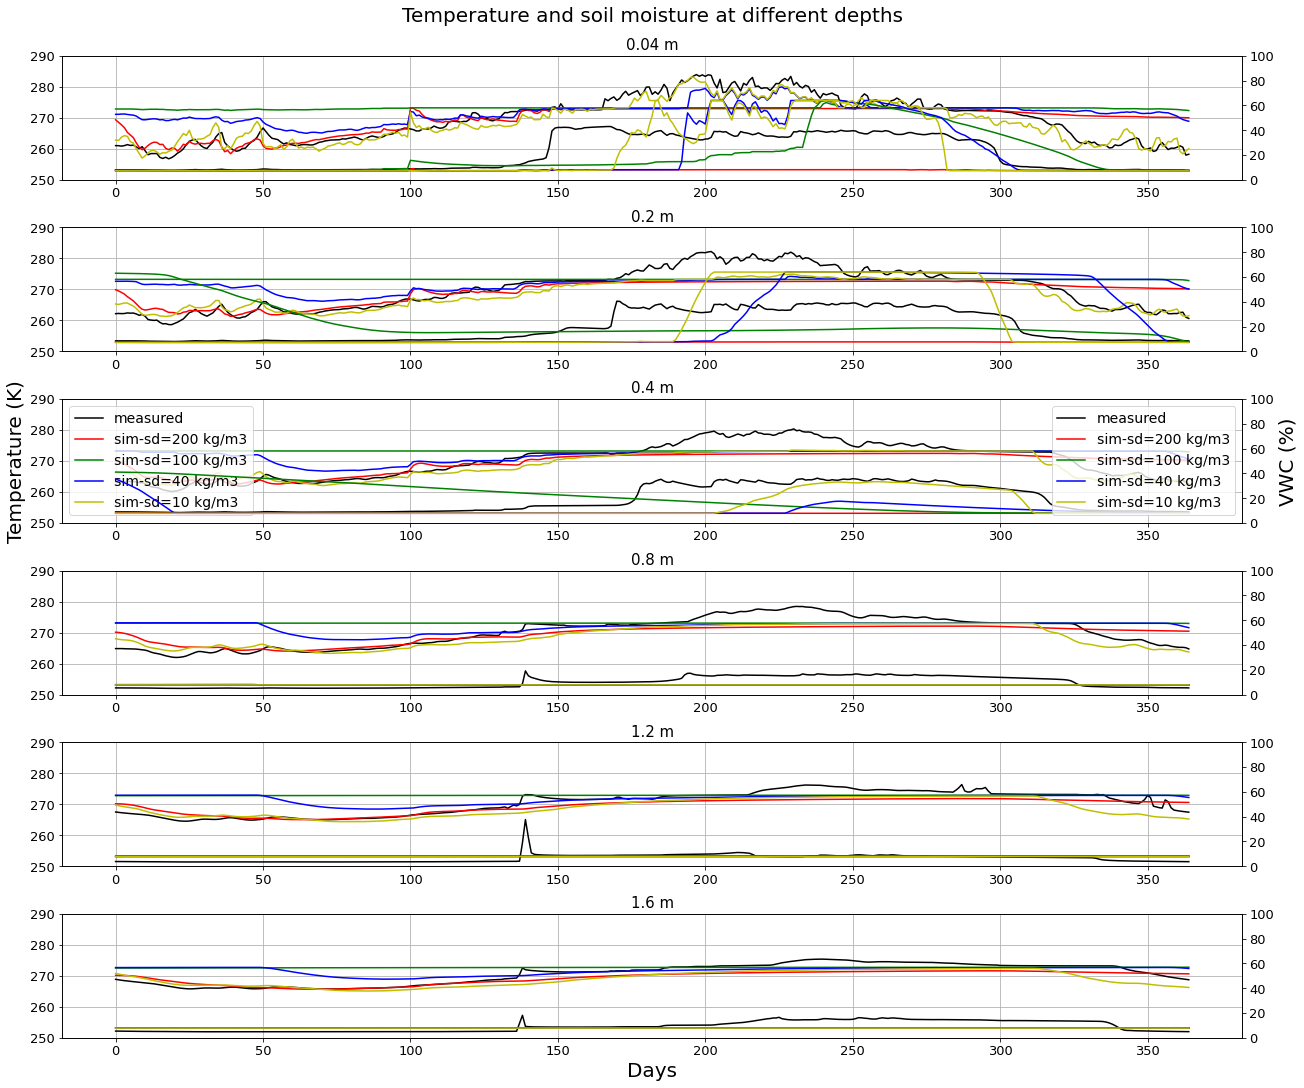

In [21]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd200[f'point -{depth} temperature [K]']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd100[f'point -{depth} temperature [K]']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd40[f'point -{depth} temperature [K]']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd10[f'point -{depth} temperature [K]']['2017'].values, 'y', label='sim-sd=10 kg/m3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2017'].values, 'k', label='measured')
    ax2.plot(time_period, sim_data_sd200[f'Soil moisture at - {depth} m (%)']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    ax2.plot(time_period, sim_data_sd100[f'Soil moisture at - {depth} m (%)']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    ax2.plot(time_period, sim_data_sd40[f'Soil moisture at - {depth} m (%)']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    ax2.plot(time_period, sim_data_sd10[f'Soil moisture at - {depth} m (%)']['2017'].values, 'y', label='sim-sd=10 kg/m3')

    #ax2.plot(time_period, mois_measured[x:x+365].values, 'k--', label=f'measured')
    #ax2.plot(time_period, mois_sim_1[x:x+365].values, 'r--', label=f'M-Case 1')
    #ax2.plot(time_period, mois_sim_2[x:x+365].values, 'b--', label=f'M-Case 2')
    #x2.plot(time_period, mois_sim_3[x:x+365].values, 'y--', label=f'M-Case 2_1')
    #ax2.plot(time_period, mois_sim_4[x:x+365].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

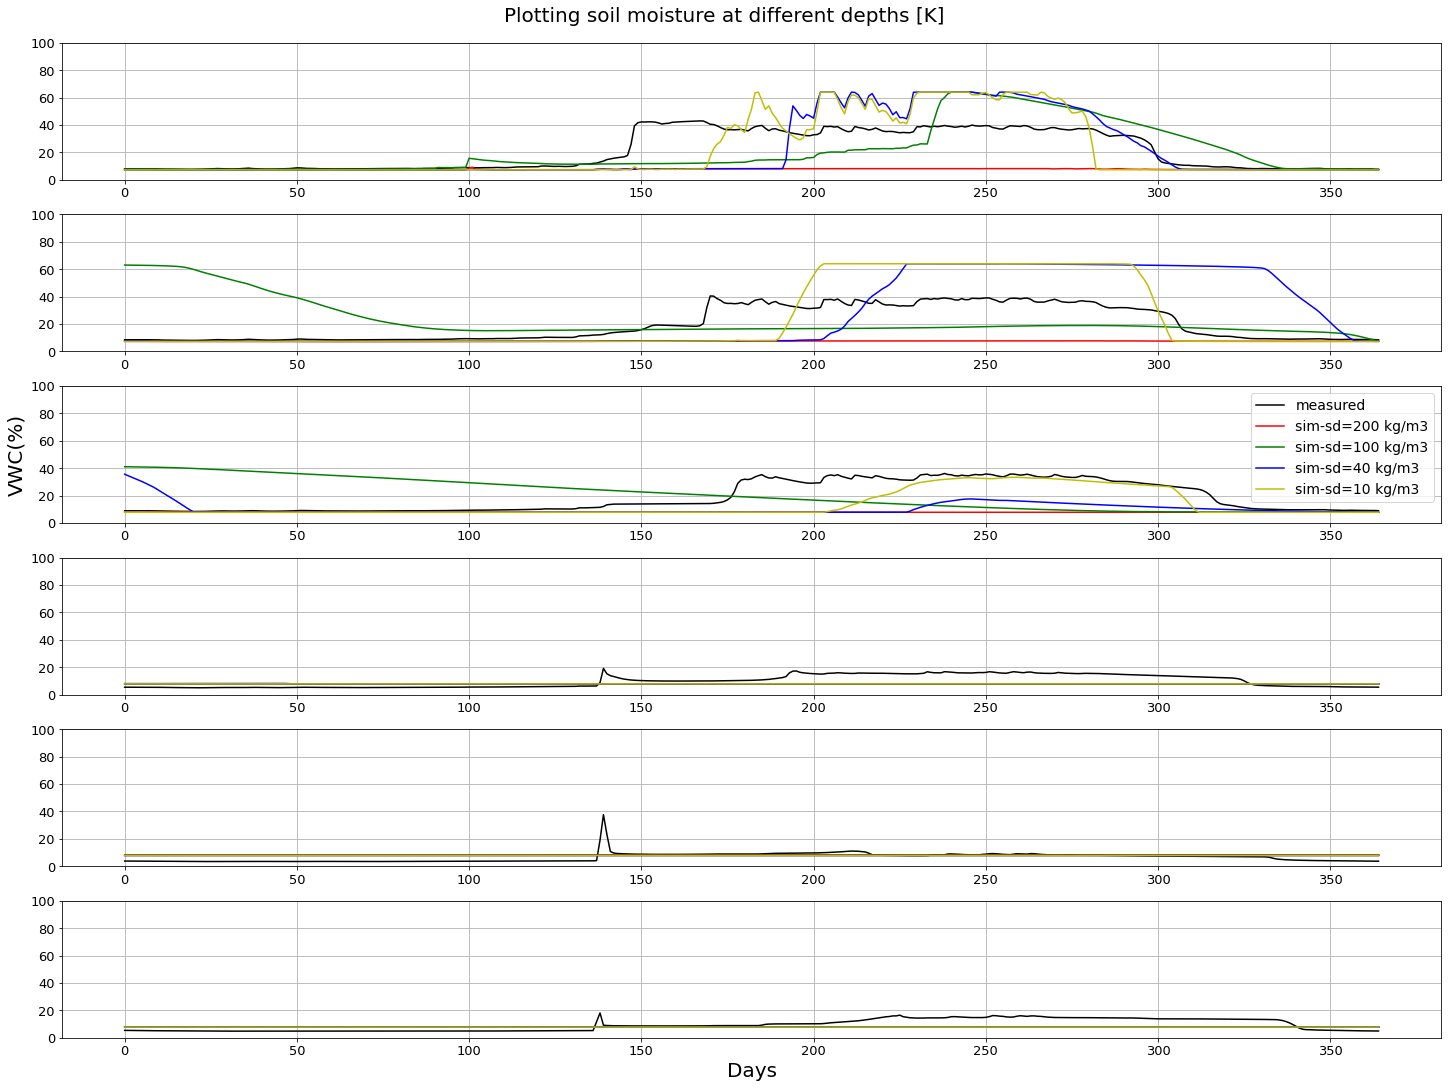

In [22]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,365)
time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd200[f'Soil moisture at - {depth} m (%)']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd100[f'Soil moisture at - {depth} m (%)']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd40[f'Soil moisture at - {depth} m (%)']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd10[f'Soil moisture at - {depth} m (%)']['2017'].values, 'y', label='sim-sd=10 kg/m3')
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    locals()['f2_ax'+str(j+1)].grid(True)


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('VWC(%)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

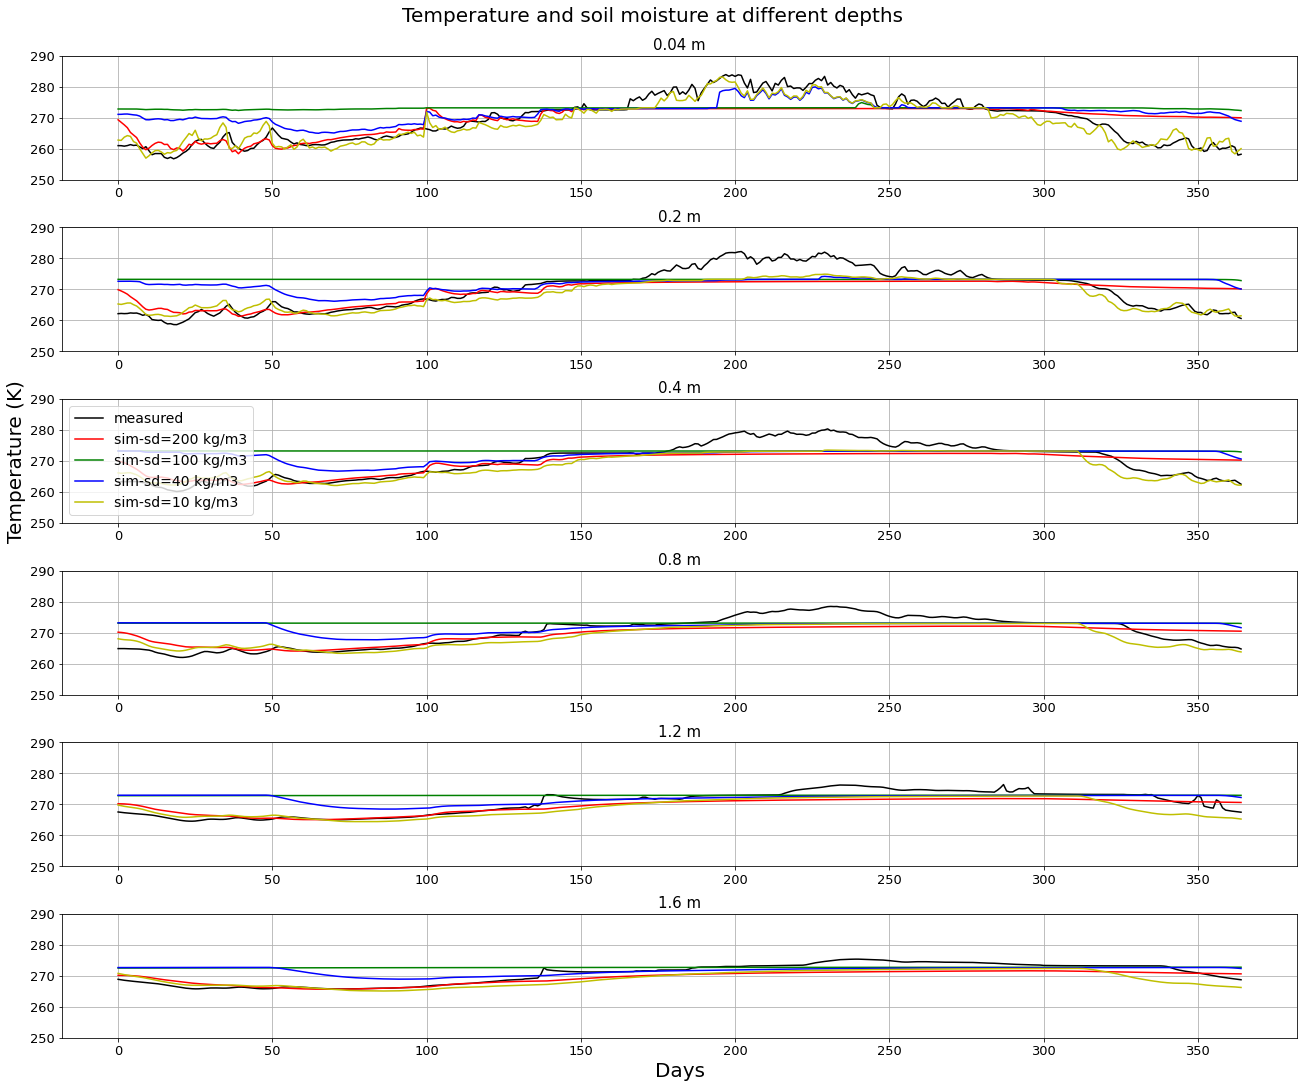

In [23]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd200[f'point -{depth} temperature [K]']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd100[f'point -{depth} temperature [K]']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd40[f'point -{depth} temperature [K]']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd10[f'point -{depth} temperature [K]']['2017'].values, 'y', label='sim-sd=10 kg/m3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

        

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)


f2_ax6.set_xlabel('Days', fontsize=20)

#### 1. Extracts the results from the observations file 

In [2]:
# Reading the csv file 
#df_observation = pd.read_csv('test_dyn_spinup.demo/observations.dat', skiprows=88, sep=' ')
df_observation = pd.read_csv('test_dyn_spinup_actual.demo/observations.dat', skiprows=88, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,
0.0,0.0,264.150176,264.150176,264.150176,264.150175,264.150175,264.150175,264.150175,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498,0.0
1.0,86400.0,263.340809,263.749204,263.997248,264.082211,264.139616,264.148858,264.149960,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498,1.0
2.0,172800.0,262.729717,263.326311,263.766176,263.939905,264.096406,264.138148,264.146925,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498,2.0
3.0,259200.0,262.264697,262.968902,263.539857,263.781473,264.032853,264.117109,264.139490,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498,3.0
4.0,345600.0,261.760148,262.600059,263.301998,263.608279,263.952977,264.085458,264.126492,0.224325,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498,4.0


In [3]:
len(df_observation)

346

#### Plotting the values 
##### 1. Subsurface temperature

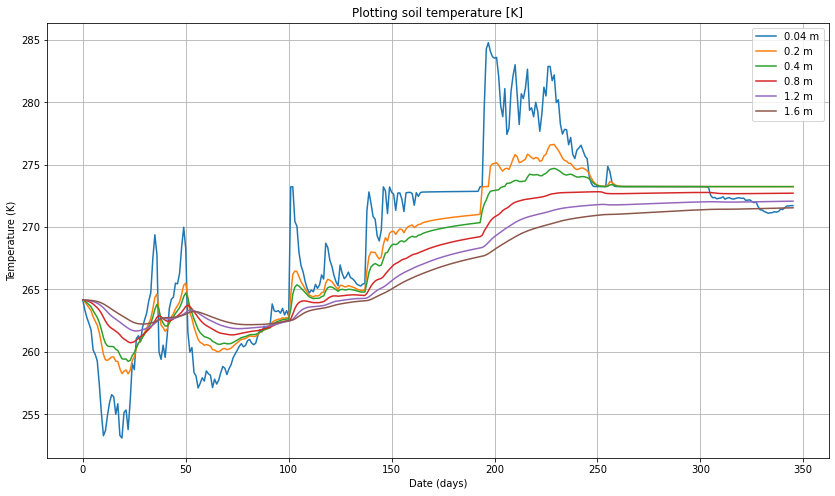

In [4]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
plt.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
plt.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
plt.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
plt.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
plt.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
plt.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
#plt.ylim(264,266)
plt.grid(True)

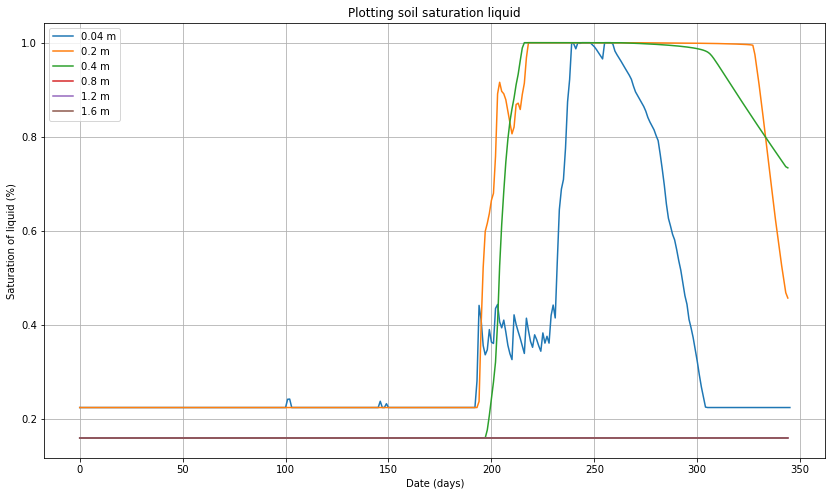

In [5]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil saturation liquid')
#plt.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
plt.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
plt.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
plt.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
plt.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
plt.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
plt.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')

plt.ylabel('Saturation of liquid (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)